In [2]:
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

# Define simulation parameters
n = 205
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 150

In [3]:
# create A, x, y, w
# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)
B = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)
mse_vs_iterationsA = np.zeros(num_iterations)
mse_vs_iterationsB = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
ya = A @ x + w 
yb = B @ x + w

# Prep for IST/AMP
za = np.zeros(ya.shape)
zb = np.zeros(yb.shape)

xHta = np.zeros(x.shape)
xHtb = np.zeros(x.shape)

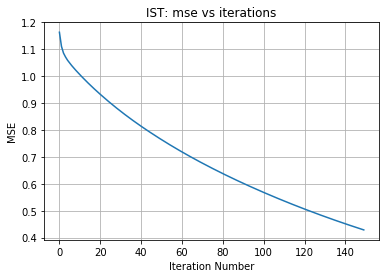

In [3]:
# benchmark IST for n = 250
# 150 iterations
# MSE vs iterations
for idx_iter in range(num_iterations):
    za = ya - A @ xHta
    r = xHta + s * A.T @ za
    xHta = eta(r, s*lambda_)
# find the current error
    err_sum1 = np.sum((x - xHta)**2)
    mse_vs_iterationsA[idx_iter] = (1/N) * err_sum1
    
# do the same for B
    zb = yb - B @ xHtb
    r = xHtb + s * B.T @ zb
    xHtb = eta(r, s*lambda_)
# find the current error
    err_sum2 = np.sum((x - xHtb)**2)
    mse_vs_iterationsB[idx_iter] = (1/N) * err_sum2    
    
for i in range(num_iterations):
    mse_vs_iterations[i] = (1/2)*(mse_vs_iterationsA[i] + mse_vs_iterationsB[i])
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()

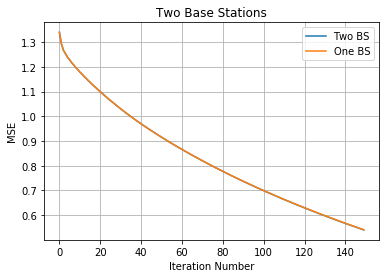

In [28]:
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

#---------------------------------------------------#
# stuff for one base station

#array of zeros the size of the iterations
mse_vs_iterations1 = np.zeros(num_iterations)

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
# MSE vs iterations
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum1 = np.sum((x - xHt)**2)
    mse_vs_iterations1[idx_iter] = (1/N) * err_sum1
    

#----------------------------------------------------#
#stuff for two base stations
# Generate noise vector w
# converts it to a column vector. nX1
w1 = sigma*np.random.randn(n).reshape(-1, 1)
w2 = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y1 = A @ x + w1 
y2 = A @ x + w2

# Prep for IST/AMP
z1 = np.zeros(y1.shape)
xHt1 = np.zeros(x.shape)
z2 = np.zeros(y2.shape)
xHt2 = np.zeros(x.shape)

for idx_iter in range(num_iterations):
    z1 = y1 - A @ xHt1
    r1 = xHt1 + s * A.T @ z1
    xHt1 = eta(r1, s*lambda_)
# same thing for BS 2
    z2 = y2 - A @ xHt2
    r2 = xHt2 + s * A.T @ z2
    xHt2 = eta(r2, s*lambda_)
#find avg xHt
    xHt_av = (1/2)*(xHt1 + xHt2)
# find the current error
    err_sum = np.sum((x - xHt_av)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations, label="Two BS")
plt.plot(range(num_iterations), mse_vs_iterations1, label="One BS")
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("Two Base Stations")
plt.legend()
plt.show()
#try avg the y's and then running IST
# BER vs SNR as well